# Loan Default Prediction 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [18]:
df=pd.read_csv("data\\Loan_default.csv")

## Data Exploration & Cleaning

In [20]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [21]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [22]:
data_types = df.dtypes
categories = ['Numeric' if dtype in ['int64', 'float64'] else 'Categorical' for dtype in data_types]
type_counts = pd.Series(categories).value_counts()


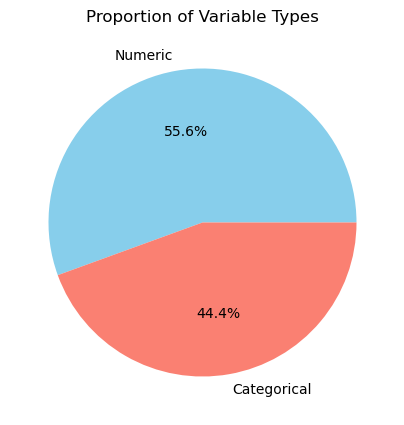

In [23]:
plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Proportion of Variable Types")
plt.show()


In [25]:
#Number of records and features
df.shape

(255347, 18)

In [27]:
#Remove duplicates
df = df.drop_duplicates()

In [31]:
#Number of records and features after removing duplicates
df.shape

(255347, 18)

In [33]:
#Check for null values
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

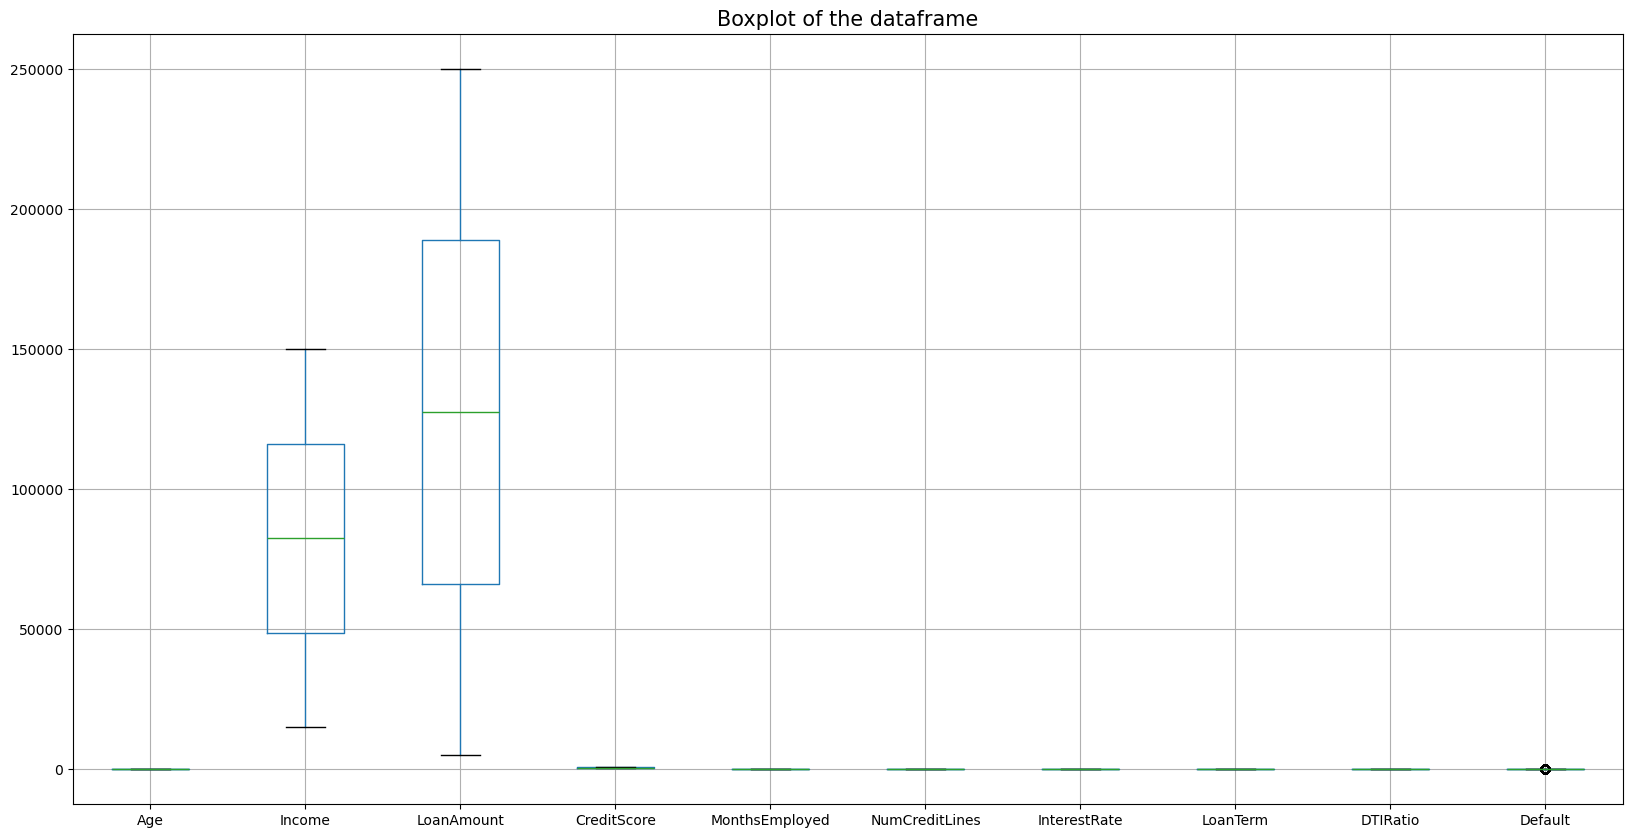

In [34]:
#Checking for outliers
plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

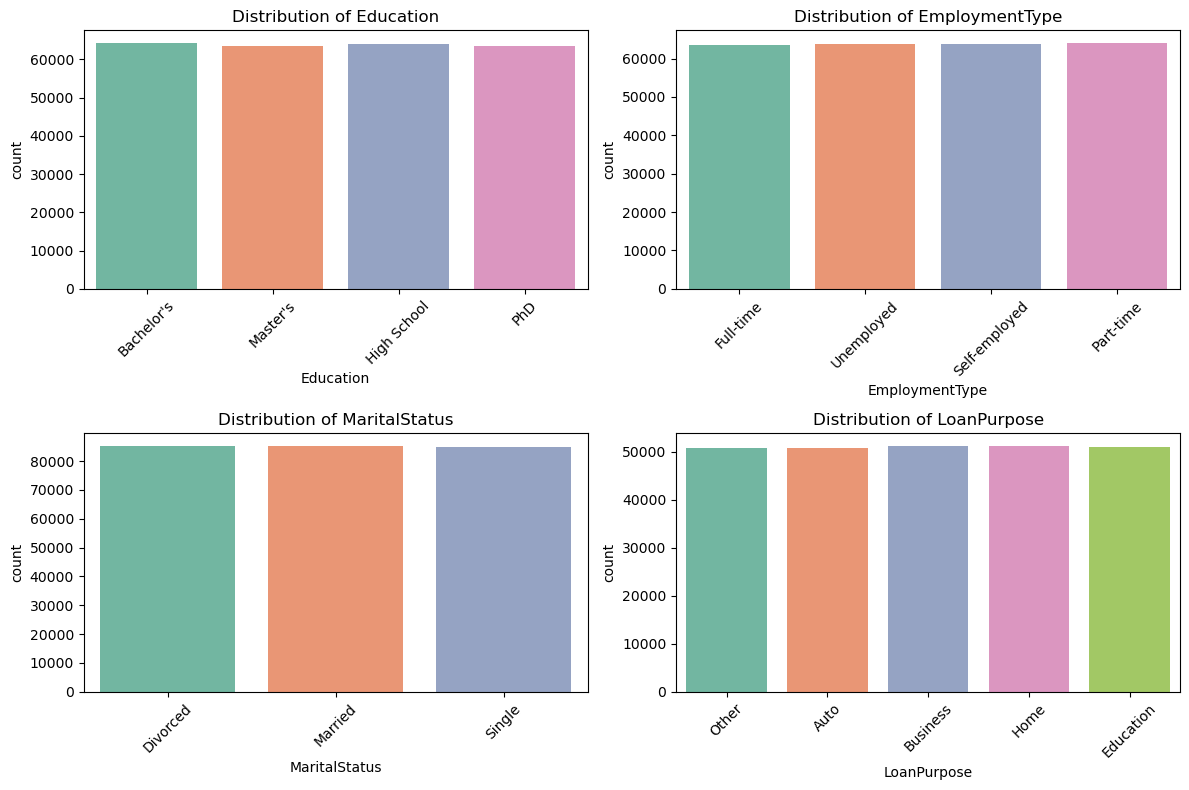

In [36]:
categorical_cols = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], hue=df[col], palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


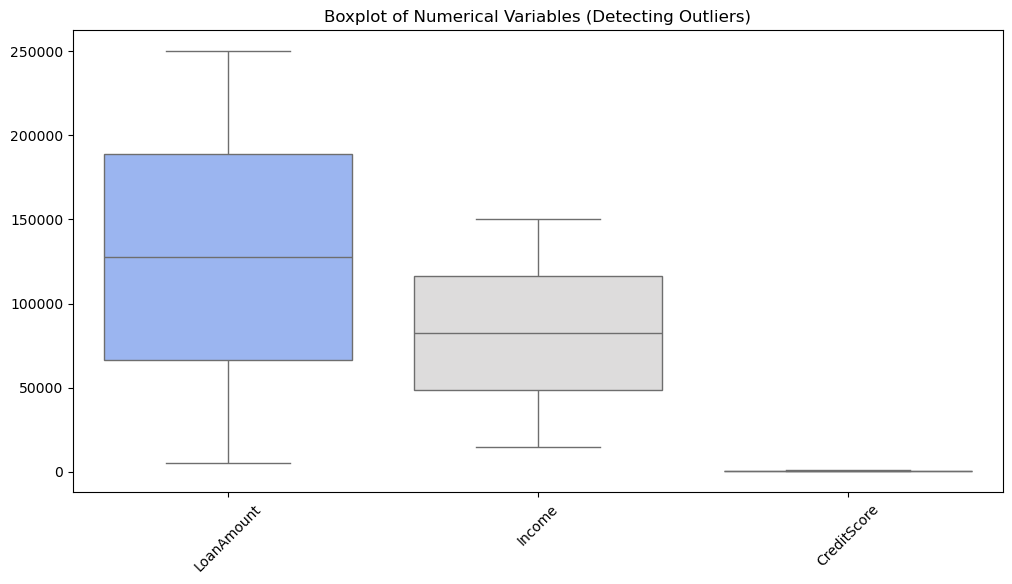

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['LoanAmount', 'Income', 'CreditScore']], palette="coolwarm")
plt.title("Boxplot of Numerical Variables (Detecting Outliers)")
plt.xticks(rotation=45)
plt.show()


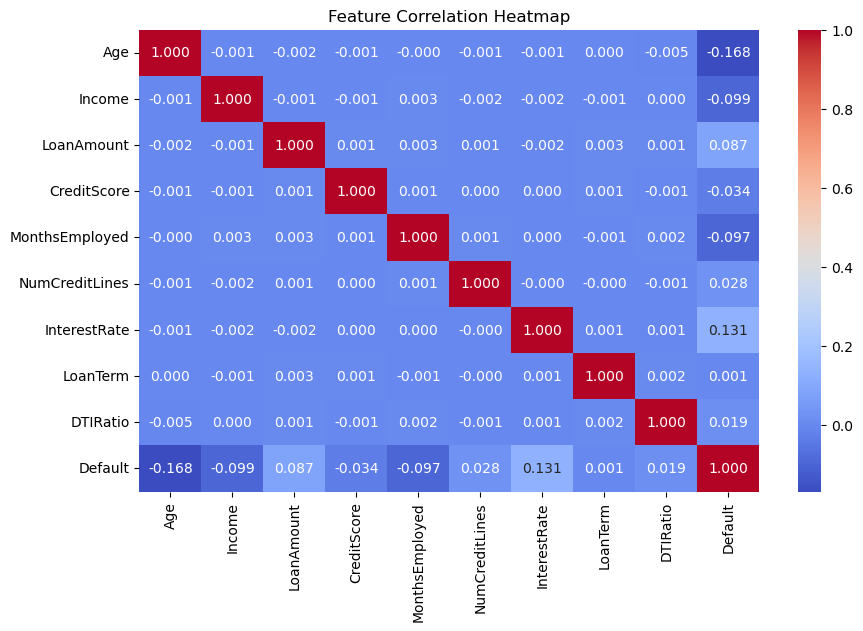

In [40]:
#Feature Correlation Heatmap
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Feature Correlation Heatmap")
plt.show()



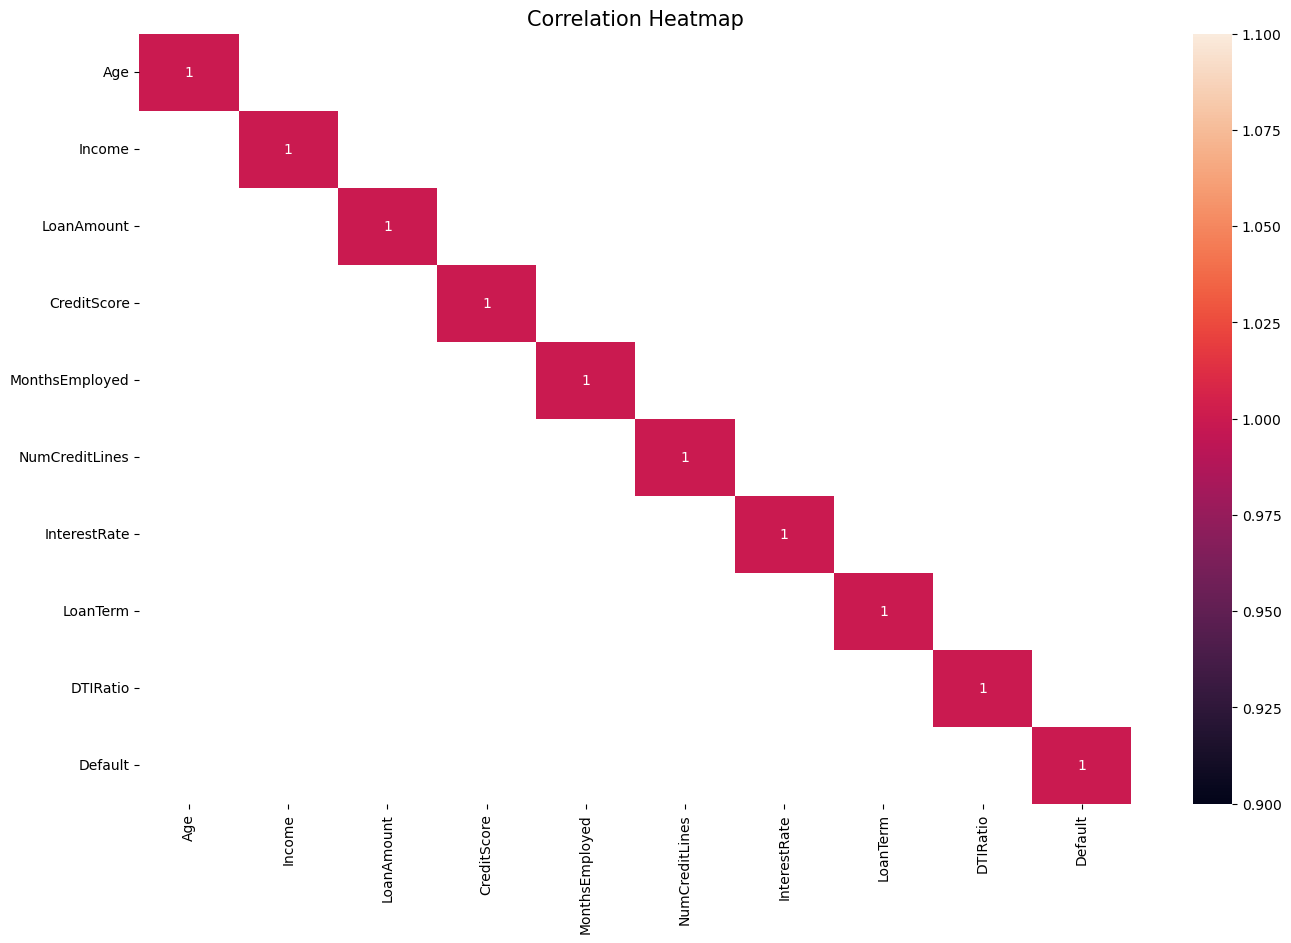

In [41]:
# Lets plot heatmap only for highly correlated features

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix[corr_matrix > 0.9], annot=True)
plt.title("Correlation Heatmap",  fontsize = 15)
plt.show()

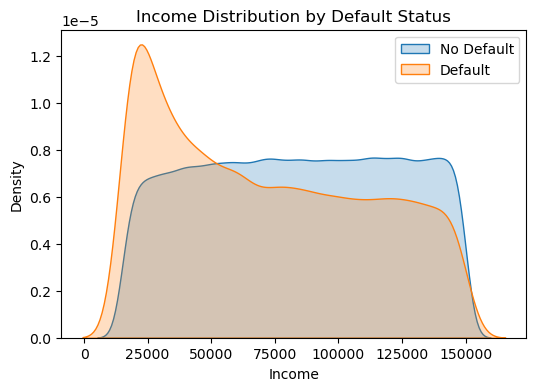

In [42]:
#Check if income has any influence over default status

plt.figure(figsize=(6, 4))
sns.kdeplot(df[df["Default"] == 0]["Income"], label="No Default", fill=True)
sns.kdeplot(df[df["Default"] == 1]["Income"], label="Default", fill=True)
plt.title("Income Distribution by Default Status")
plt.legend()
plt.show()


In [43]:
###sns.pairplot(df,hue='Default',palette='bwr')

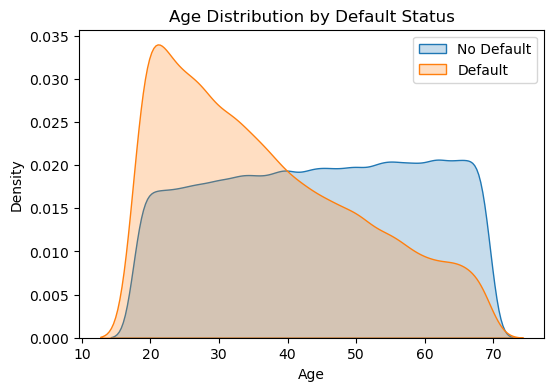

In [44]:
#Check if age has any influence over default status

plt.figure(figsize=(6, 4))
sns.kdeplot(df[df["Default"] == 0]["Age"], label="No Default", fill=True)
sns.kdeplot(df[df["Default"] == 1]["Age"], label="Default", fill=True)
plt.title("Age Distribution by Default Status")
plt.legend()
plt.show()

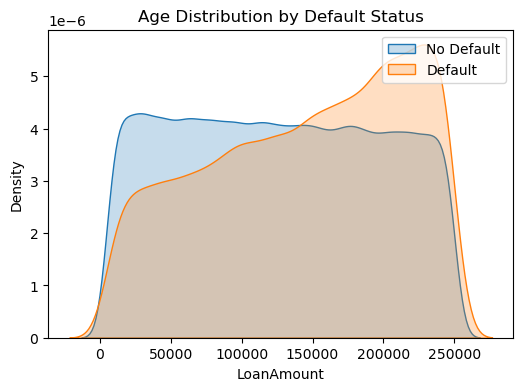

In [45]:
#Check if loan Amount has any influence over default status

plt.figure(figsize=(6, 4))
sns.kdeplot(df[df["Default"] == 0]["LoanAmount"], label="No Default", fill=True)
sns.kdeplot(df[df["Default"] == 1]["LoanAmount"], label="Default", fill=True)
plt.title("Age Distribution by Default Status")
plt.legend()
plt.show()

In [46]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [47]:
# Binary Categorical Columns - Use Label Encoding
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
label_enc = LabelEncoder()

for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col])

# Multi-category Columns - Use One-Hot Encoding
multi_cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)  

print(df.head()) 

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ...  Education_PhD  \
0               4         15.23        36      0.44  ...          False   
1               1          4.81        60      0.68  ...          False   
2               3         21.17        24      0.31  ...          False   
3               3          7.07        24      0.23  ...          False   
4               4          6.51        48      0.73  ...          False   

   EmploymentType_Part-time  EmploymentType_Self-employed  \
0                     False                         False   


In [48]:
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,False,False,False,False,False,False,False,False,False,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,False,False,False,False,True,False,False,False,False,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,False,False,False,True,False,False,False,False,False,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,False,False,False,False,True,False,True,False,False,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,False,False,False,True,False,False,False,False,False,False


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   LoanID                        255347 non-null  object 
 1   Age                           255347 non-null  int64  
 2   Income                        255347 non-null  int64  
 3   LoanAmount                    255347 non-null  int64  
 4   CreditScore                   255347 non-null  int64  
 5   MonthsEmployed                255347 non-null  int64  
 6   NumCreditLines                255347 non-null  int64  
 7   InterestRate                  255347 non-null  float64
 8   LoanTerm                      255347 non-null  int64  
 9   DTIRatio                      255347 non-null  float64
 10  HasMortgage                   255347 non-null  int32  
 11  HasDependents                 255347 non-null  int32  
 12  HasCoSigner                   255347 non-nul

## Modeling

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

*first we are bringing all the numeric variable to similar scale*

In [53]:
numerical_features = [
    'LoanAmount', 
    'Income', 
    'CreditScore',
    'MonthsEmployed', 
    'NumCreditLines', 
    'InterestRate', 
    'LoanTerm', 
    'DTIRatio',
    'Age'
]

# Apply standard scalar to bring all the numbers in standard range
scaler = StandardScaler()


df[numerical_features] = scaler.fit_transform(df[numerical_features])


df[numerical_features].head()



,LoanAmount,Income,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Age
0,-1.086833,0.089693,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0.833990
1,-0.044309,-0.823021,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,1.701221
2,0.022715,0.043854,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,0.166888
3,-1.168538,-1.303452,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,-0.767053
4,-1.671921,-1.592855,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,1.100830


*Data partition*

In [55]:
X = df.drop(["Default","LoanID"], axis=1)
y = df["Default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [57]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Default
count,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,255347.000000,255347.000000,255347.000000,255347.000000
mean,-1.808726e-16,3.695367e-17,4.082156e-17,2.277882e-16,9.345549e-17,-4.499206e-17,-6.619937e-16,1.849770e-16,5.248088e-17,0.500014,0.500268,0.500108,0.116128
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.500001,0.500001,0.500001,0.320379
min,-1.700995e+00,-1.732398e+00,-1.730348e+00,-1.725980e+00,-1.718715e+00,-1.343791e+00,-1.731770e+00,-1.415845e+00,-1.733149e+00,0.000000,0.000000,0.000000,0.000000
25%,-8.337635e-01,-8.642522e-01,-8.670578e-01,-8.638217e-01,-8.527470e-01,-4.485487e-01,-8.623271e-01,-7.086855e-01,-8.670336e-01,0.000000,0.000000,0.000000,0.000000
50%,-3.324207e-02,-8.547763e-04,-3.227743e-04,-1.663564e-03,1.322113e-02,-4.485487e-01,-4.938420e-03,-1.525943e-03,-9.183609e-04,1.000000,1.000000,1.000000,0.000000
75%,8.339895e-01,8.654300e-01,8.668216e-01,8.667877e-01,8.791892e-01,4.466940e-01,8.675186e-01,7.056336e-01,8.651968e-01,1.000000,1.000000,1.000000,0.000000
max,1.701221e+00,1.732408e+00,1.728108e+00,1.728946e+00,1.716292e+00,1.341937e+00,1.733948e+00,1.412793e+00,1.731312e+00,1.000000,1.000000,1.000000,1.000000


In [58]:
df.dtypes

LoanID                           object
Age                             float64
Income                          float64
LoanAmount                      float64
CreditScore                     float64
MonthsEmployed                  float64
NumCreditLines                  float64
InterestRate                    float64
LoanTerm                        float64
DTIRatio                        float64
HasMortgage                       int32
HasDependents                     int32
HasCoSigner                       int32
Default                           int64
Education_High School              bool
Education_Master's                 bool
Education_PhD                      bool
EmploymentType_Part-time           bool
EmploymentType_Self-employed       bool
EmploymentType_Unemployed          bool
MaritalStatus_Married              bool
MaritalStatus_Single               bool
LoanPurpose_Business               bool
LoanPurpose_Education              bool
LoanPurpose_Home                   bool


In [59]:
# Model - Logistic Regression

print("\n--- Logistic Regression ---")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Accuracy: 0.8858429606422558
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



In [60]:
# Model - Decision Tree

print("\n--- Decision Tree ---")
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))



--- Decision Tree ---
Accuracy: 0.8852946935578617
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.55      0.04      0.07      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.52      0.51     51070
weighted avg       0.85      0.89      0.84     51070



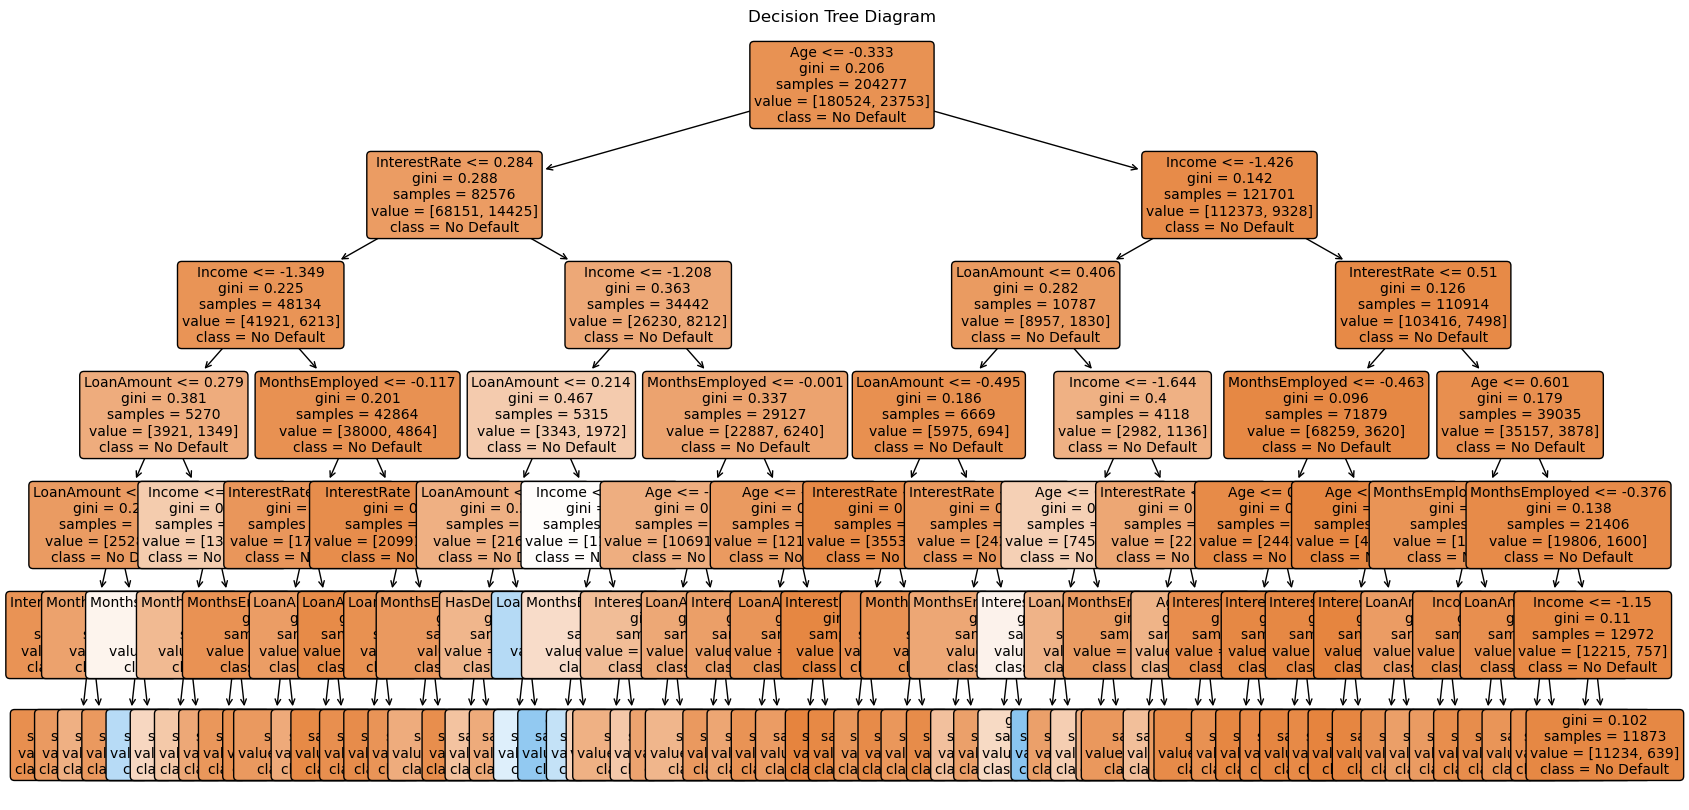

In [61]:
# Model - Plot Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt, 
    feature_names=X.columns,         
    class_names=["No Default", "Default"],  
    filled=True,                     
    rounded=True,                    
    fontsize=10
)
plt.title("Decision Tree Diagram")
plt.show()


In [84]:
# Model - Random Forest

print("\n--- Random Forest ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



--- Random Forest ---
Accuracy: 0.8865087135304484
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.69      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.52      0.50     51070
weighted avg       0.86      0.89      0.84     51070



Random Forest Feature Importances:
Income                          0.125919
InterestRate                    0.119457
LoanAmount                      0.113162
Age                             0.103265
CreditScore                     0.099601
MonthsEmployed                  0.097295
DTIRatio                        0.087892
LoanTerm                        0.040589
NumCreditLines                  0.032297
HasMortgage                     0.014715
MaritalStatus_Single            0.014072
HasDependents                   0.012490
LoanPurpose_Business            0.012170
LoanPurpose_Education           0.012150
Education_High School           0.012119
LoanPurpose_Other               0.011927
Education_Master's              0.011873
Education_PhD                   0.011830
EmploymentType_Self-employed    0.011804
EmploymentType_Part-time        0.011793
HasCoSigner                     0.011724
MaritalStatus_Married           0.011673
EmploymentType_Unemployed       0.010096
LoanPurpose_Home      

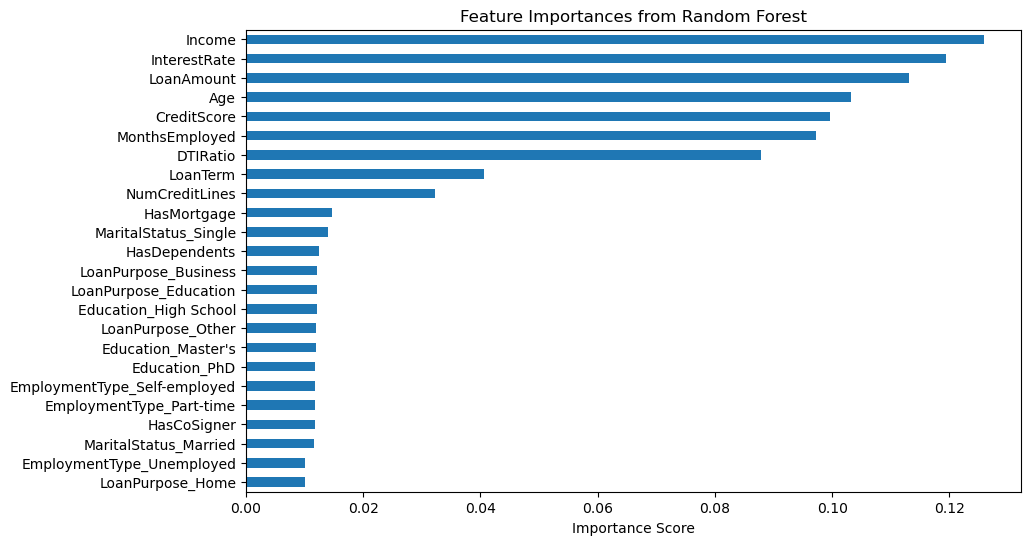

In [87]:
# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Random Forest Feature Importances:")
print(importances.sort_values(ascending=False))

# Visualize feature importances
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.show()

In [88]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importances = pd.Series(result.importances_mean, index=X.columns)
print("Permutation Importances:")
print(perm_importances.sort_values(ascending=False))


Permutation Importances:
Income                          3.330723e-03
LoanAmount                      2.010965e-03
Age                             1.593891e-03
InterestRate                    1.151361e-03
MonthsEmployed                  9.398864e-04
EmploymentType_Unemployed       4.542784e-04
HasDependents                   3.211279e-04
CreditScore                     2.760916e-04
Education_High School           1.958097e-04
HasCoSigner                     1.781868e-04
MaritalStatus_Married           1.409830e-04
LoanPurpose_Other               1.390249e-04
MaritalStatus_Single            1.116115e-04
LoanPurpose_Business            7.832387e-05
LoanPurpose_Home                7.049148e-05
LoanPurpose_Education           6.461719e-05
EmploymentType_Self-employed    5.482671e-05
Education_Master's              3.720384e-05
DTIRatio                        2.741335e-05
HasMortgage                     1.566477e-05
NumCreditLines                  3.916193e-06
EmploymentType_Part-time      

In [89]:
# Model - KNN Classifier

print("\n--- KNN Classifier ---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))



--- KNN Classifier ---
Accuracy: 0.8752692383003721
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     45170
           1       0.33      0.08      0.13      5900

    accuracy                           0.88     51070
   macro avg       0.61      0.53      0.53     51070
weighted avg       0.83      0.88      0.84     51070



In [90]:
# Model - Gradient Boosting Classifier

print("\n--- Gradient Boosting Classifier ---")
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))



--- Gradient Boosting Classifier ---
Accuracy: 0.8871744664186411
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.65      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



In [91]:
# Model - AdaBoost Classifier

print("\n--- AdaBoost Classifier ---")
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))



--- AdaBoost Classifier ---


C:\Users\r_bho\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8869199138437439
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.06      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.53      0.52     51070
weighted avg       0.86      0.89      0.84     51070




--- K-Means Clustering ---


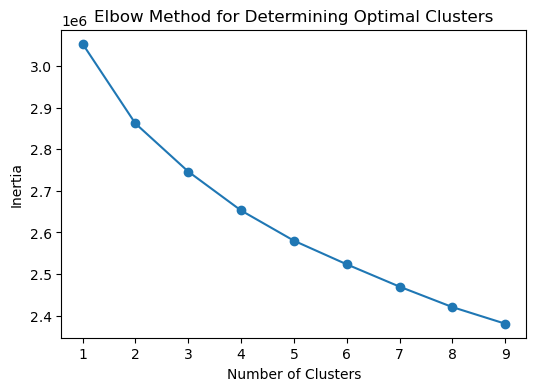

In [92]:
# Model - K-Means Clustering

print("\n--- K-Means Clustering ---")

inertia = []
cluster_range = range(1, 10)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Determining Optimal Clusters")
plt.show()



In [93]:
# Let's assume the Elbow suggests 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

print("\nCluster Counts:")
print(df['Cluster'].value_counts())

# Compare clusters with the default rate
cluster_default_rate = df.groupby('Cluster')['Default'].mean()
print("\nDefault Rate by Cluster:")
print(cluster_default_rate)


Cluster Counts:
Cluster
2    95904
0    80732
1    78711
Name: count, dtype: int64

Default Rate by Cluster:
Cluster
0    0.111220
1    0.173051
2    0.073542
Name: Default, dtype: float64


In [ ]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_default_rate.index, y=cluster_default_rate.values)
plt.xlabel("Cluster")
plt.ylabel("Default Rate")
plt.title("Default Rate by Cluster")
plt.show()
